<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [IHR1](#IHR1)
* [IHR2](#IHR2)
* [IHR3](#IHR3)
* [IHR4](#IHR4)
* [IHR6](#IHR6)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the IHR benchmark, as described in Table 6, p. 16 [1].

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials with a maximum of 50.000 function evaluations.

In [13]:
import dataclasses

import math
import numpy as np

from anguilla.fitness.base import ObjectiveFunction
from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, pareto_front_plot_2d, runtime_summary, volume_summary

In [2]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 10

# Number of parents
N_PARENTS = 20

INITIAL_STEP_SIZE = 1.0

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 54569883

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# 2) Other global values

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls: ObjectiveFunction):
    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                initial_step_size=INITIAL_STEP_SIZE,
                max_evaluations=MAX_EVALUATIONS,
            )

def run(fn_cls: ObjectiveFunction, **parameter_replacements: dict):
    params = dataclasses.replace(get_base_params(fn_cls), **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## IHR1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.55s, ask = 0.30s, tell = 0.51s, eval = 1.75s
No reference point was provided.


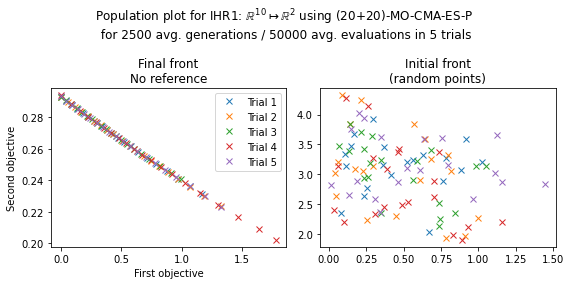

In [3]:
fig = run(benchmark.IHR1, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.53s, ask = 0.30s, tell = 0.50s, eval = 1.73s
No reference point was provided.


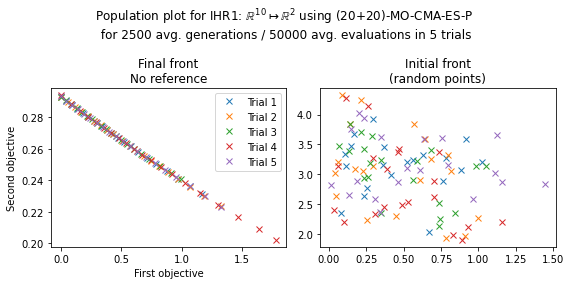

In [4]:
fig = run(benchmark.IHR1)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.IHR1, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.IHR1, n_offspring=1)

## IHR2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.66s, ask = 0.32s, tell = 0.57s, eval = 1.76s
No reference point was provided.


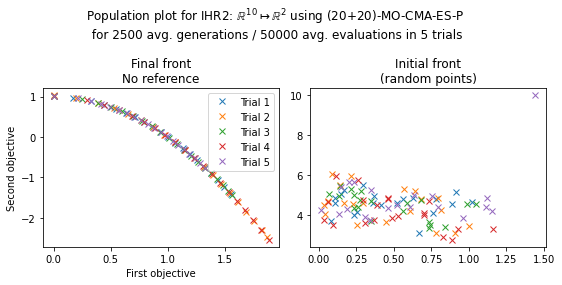

In [5]:
fig = run(benchmark.IHR2, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.76s, ask = 0.34s, tell = 0.60s, eval = 1.83s
No reference point was provided.


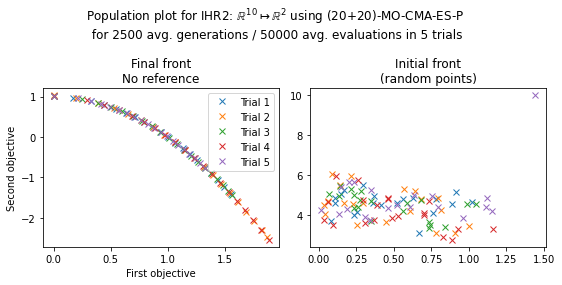

In [6]:
fig = run(benchmark.IHR2)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.IHR2, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.IHR2, n_offspring=1)

## IHR3
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.81s, ask = 0.32s, tell = 0.52s, eval = 1.97s
No reference point was provided.


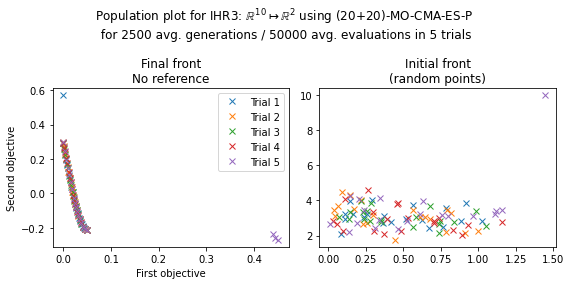

In [7]:
fig = run(benchmark.IHR3, success_notion="individual")

### Population-based

We observe that unlike with the individual-based notion of success, the extrema are populated.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.99s, ask = 0.34s, tell = 0.56s, eval = 2.09s
No reference point was provided.


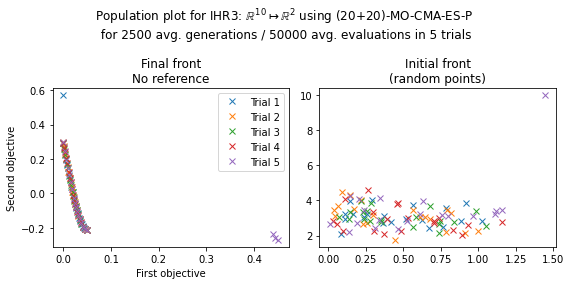

In [8]:
fig = run(benchmark.IHR3)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.IHR3, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.IHR3, n_offspring=1)

## IHR4
[Back to top](#top)

### Individual-based

In [9]:
fig = run(benchmark.IHR4, success_notion="individual")

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.83s, ask = 0.33s, tell = 0.52s, eval = 1.98s
No reference point was provided.


### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.87s, ask = 0.34s, tell = 0.52s, eval = 2.02s
No reference point was provided.


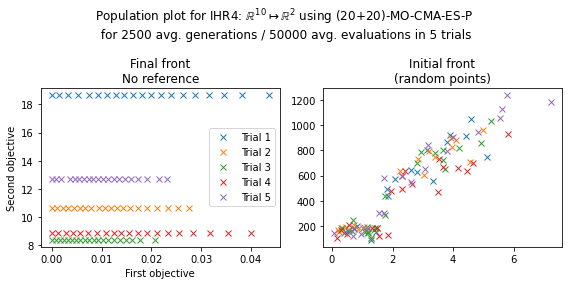

In [10]:
fig = run(benchmark.IHR4)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.IHR4, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.IHR4, n_offspring=1)

## IHR6
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.45s, ask = 0.33s, tell = 0.44s, eval = 1.68s
No reference point was provided.


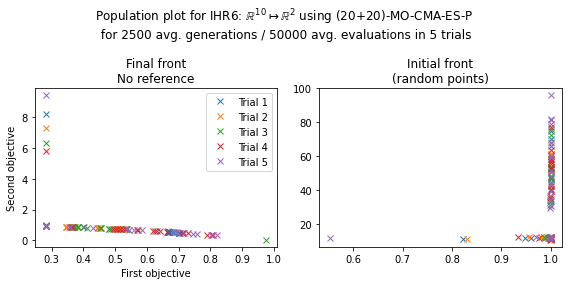

In [11]:
fig = run(benchmark.IHR6, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.69s, ask = 0.36s, tell = 0.48s, eval = 1.85s
No reference point was provided.


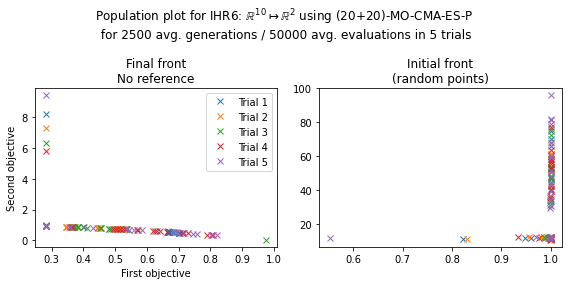

In [12]:
fig = run(benchmark.IHR6)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.IHR6, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.IHR6, n_offspring=1)

## References
[Back to top](#top)

[1] C. Igel, N. Hansen, and S. Roth. Covariance matrix adaptation for multi-objective optimization. Evolutionary Computation, 15(1):1â€“28, 2007. doi:10.1162/evco.2007.15.1.1.